### Building your model

**Model definition**

<img src="https://i.imgur.com/kKBmOPd.jpg" width="200" height="250">

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# 建構16x16x1神經網路
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

編譯模型

| 問題種類 | 損失函數 | 選擇 |
| :--- | :---| :---|
|二元分類 |binary_crossentropy| ●|
|單標籤多元分類 |categorical_crossentropy| ○|
|多標籤多元分類 |binary_crossentropy| ○|
|迴歸分析 |mse| ○|
|迴歸值在0~1之間 |mse 或 binary_crossentropy| ○|

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

####x,y,train,test差異

In [ ]:
# train: 訓練資料集   test: 測試資料集
# x:數據(已編碼)   y:標籤
print(x_train[0])
print(y_train[0])
print(x_test[0])
print(y_test[0])

[0. 1. 1. ... 0. 0. 0.]
1.0
[0. 1. 1. ... 0. 0. 0.]
0.0


####**Setting aside a validation set**


| 項目 | 訓練資料 | 驗證資料 |
| :--- | :---| :---|
|x_train |10000~25000|0~9999|
|y_train |10000~25000|0~9999|


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

採用驗證資料；訓練週期20，批次尺寸512

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5676 - accuracy: 0.7753 - val_loss: 0.4686 - val_accuracy: 0.8477
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3708 - accuracy: 0.8945 - val_loss: 0.3493 - val_accuracy: 0.8739
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2689 - accuracy: 0.9168 - val_loss: 0.3018 - val_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2072 - accuracy: 0.9349 - val_loss: 0.2783 - val_accuracy: 0.8915
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1661 - accuracy: 0.9503 - val_loss: 0.3053 - val_accuracy: 0.8763
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1399 - accuracy: 0.9561 - val_loss: 0.2797 - val_accuracy: 0.8900
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1146 - accuracy: 0.9667 - val_loss: 0.2906 - val_accuracy: 0.8867
Epoch 8/20
30

####取出訓練過程時的所有數據

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

####**Plotting the training and validation loss**

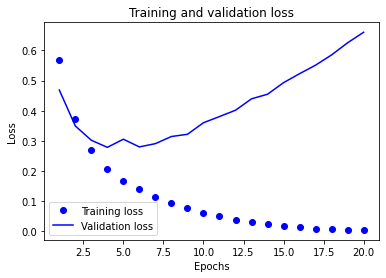

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

####**Plotting the training and validation accuracy**

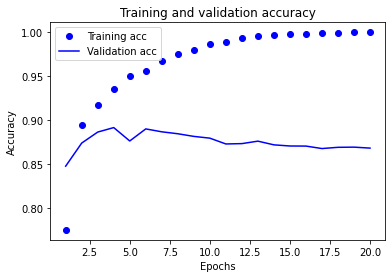

In [ ]:
plt.clf() # clear the current figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

####**Retraining a model from scratch**

使用較少的訓練週期，避免過度擬合之情況

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4331 - accuracy: 0.8193
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2476 - accuracy: 0.9115
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1928 - accuracy: 0.9291
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3149 - accuracy: 0.8758


印出測試資料集的：損失、準確率

`loss, accuracy = model.evaluate(x_test, y_test)`

In [ ]:
results

[0.3148927092552185, 0.875760018825531]

### Using a trained model to generate predictions on new data (預測新數據之結果)

以下可觀察出，

       0.99...的預測結果表示很接近1 => 極可能為正向評論
       0.01...的預測結果表示很接近0 => 極可能為負向評論

In [ ]:
model.predict(x_test)

array([[0.28915486],
       [0.99985814],
       [0.9438199 ],
       ...,
       [0.1788749 ],
       [0.09173775],
       [0.71508294]], dtype=float32)

### Further experiments

### Wrapping up